In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from nltk.corpus import stopwords
import nltk
import string
import contractions
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edorj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def _importData():
    global ds
    ds = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [3]:
def _preprocess():
    num_rows = len(ds)
    stop_words = set(stopwords.words('english'))

    for row in range(num_rows):
        processed_words=[]
        for word in ds.loc[row, 'message'].split():
            expanded_words = contractions.fix(word)
            word_without_punct = expanded_words.translate(str.maketrans('', '', string.punctuation))
            word_lowercase = word_without_punct.lower()
            for single_word in word_lowercase.split():
                if single_word not in stop_words:
                    processed_words.append(single_word)
        ds.loc[row, 'message'] = ' '.join(processed_words)
# Before
# <5572x8710 sparse matrix of type '<class 'numpy.float64'>'
# with 74165 stored elements in Compressed Sparse Row format>
# After
# <5572x9326 sparse matrix of type '<class 'numpy.float64'>'
# with 45518 stored elements in Compressed Sparse Row format>

In [4]:
def _changelabel():
    global y, x
    ds['label'] = ds.label.map({'ham':0, 'spam':1})
    y = ds['label']
    x = ds['message']

In [5]:
def _vectorizer():
    global X
    vec = TfidfVectorizer()
    X = vec.fit_transform(x)

In [6]:
def _split(size):
    global x_train, x_test, y_train, y_test
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=size)

In [7]:
def _createModel():
    global model
    model = MultinomialNB()

In [8]:
def _fit():
    model.fit(x_train, y_train)

In [9]:
def _predict():
    global y_pred
    y_pred = model.predict(x_test)

In [10]:
def _cm():
    global cm, disp
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['ham', 'spam'])

In [11]:
def _score():
    precisionHam = cm[0][0] /( cm[0][0] + cm[1][0])
    recallHam = cm[0][0] /( cm[0][0] + cm[0][1])
    f1Ham = (2 * precisionHam * recallHam) / (precisionHam + recallHam)
    supportHam = cm[0][0] + cm[0][1]    

    precisionSpam = cm[1][1] /( cm[1][1] + cm[0][1])
    recallSpam = cm[1][1] /( cm[1][1] + cm[1][0])
    f1Spam = (2 * precisionSpam * recallSpam) / (precisionSpam + recallSpam)
    supportSpam = cm[1][0] + cm[1][1]

    allSupport = (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    accuracy = (cm[0][0] + cm[1][1]) / allSupport

    macro_avg_precision = (precisionHam + precisionSpam) / 2
    macro_avg_recall = (recallHam + recallSpam) / 2
    macro_avg_f1 = (f1Ham + f1Spam) / 2

    weighted_avg_precision = (precisionHam * supportHam + precisionSpam * supportSpam) / allSupport
    weighted_avg_recall = (recallHam * supportHam + recallSpam * supportSpam) / allSupport
    weighted_avg_f1 = (f1Ham * supportHam + f1Spam * supportSpam) / allSupport

    print("\t\tPrecision \tRecall \tF1-score \tSupport")
    print(f"Ham    \t\t{precisionHam:.2f} \t\t{recallHam:.2f} \t{f1Ham:.2f} \t\t{supportHam}")
    print(f"Spam   \t\t{precisionSpam:.2f} \t\t{recallSpam:.2f} \t{f1Spam:.2f} \t\t{supportSpam}")
    print(f"Accuracy\t\t\t\t{accuracy:.2f}\t\t{allSupport}")
    print(f"Macro avg\t{macro_avg_precision:.2f} \t\t{macro_avg_recall:.2f} \t{macro_avg_f1:.2f} \t\t{allSupport}")
    print(f"Weighted avg\t{weighted_avg_precision:.2f} \t\t{weighted_avg_recall:.2f} \t{weighted_avg_f1:.2f} \t\t{allSupport}")

In [12]:
def _report():
    global report
    report = classification_report(y_test, y_pred)

In [13]:
_importData()
_preprocess()
_changelabel()
_vectorizer()
_split(0.3)
_createModel()
_fit()
_predict()
_cm()
_report()


In [14]:
X

<5572x9326 sparse matrix of type '<class 'numpy.float64'>'
	with 45518 stored elements in Compressed Sparse Row format>

In [15]:
_score()
print(report)

		Precision 	Recall 	F1-score 	Support
Ham    		0.95 		1.00 	0.97 		1446
Spam   		1.00 		0.66 	0.80 		226
Accuracy				0.95		1672
Macro avg	0.98 		0.83 	0.89 		1672
Weighted avg	0.96 		0.95 	0.95 		1672
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1446
           1       1.00      0.66      0.80       226

    accuracy                           0.95      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.95      0.95      1672



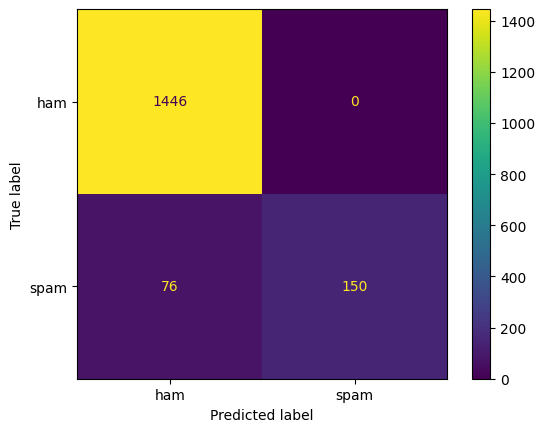

In [16]:
disp.plot()